In [71]:
# load JSON
import json
import pandas as pd

df = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
df = df.sort_values(by=['ds'])

df1 = df

In [72]:
# Load the Pandas libraries with alias 'pd' 
df = pd.read_pickle('groundLevel/airQualityDataframe-ELYS.pkl')
df = df.sort_values(by=['ds'])

df2 = df
test = df2.y
test = test.astype(float)
df2.y = test

In [73]:
# merge two dataframes matching
df_merge = df1.merge(df2, left_on='ds', right_on='ds', how='outer')

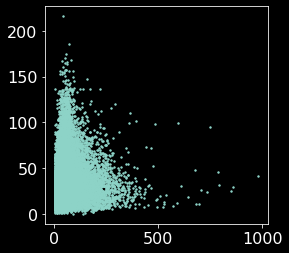

In [78]:
import matplotlib.pyplot as plt
import matplotlib

font = {'size': 16,             # font setting
       'weight':'normal'}       # font setting
matplotlib.rc('font', **font)   # font setting

plt.figure(figsize=(4, 4))
plt.scatter(df_merge['y_x'],df_merge['y_y'],2)
#plt.xlabel('metro')
#plt.ylabel('street')
plt.savefig('pickleToData_metroVsStreet_corr.png',transparent=True)

89.68133690756385
0.10744356291771434
48333


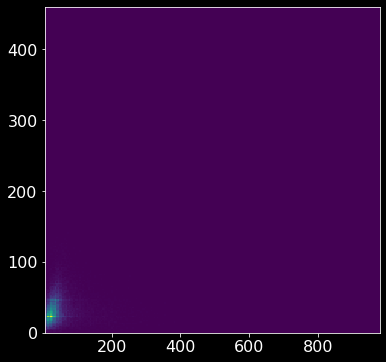

In [127]:
# drop nan's from merged array
df_merge = df_merge.dropna() # drop nan's (any rows with at least 1 NaN)

# covariance / correlation 
val = df_merge.y_x.cov(df_merge.y_y)
print(val)
val = df_merge.y_x.corr(df_merge.y_y)
print(val)

# 2D histogram
print(len(df_merge))
plt.figure(figsize=(6, 6))
hist2dArr = plt.hist2d(df_merge['y_x'], df_merge['y_y'], bins=220)  # sqrt(48333)

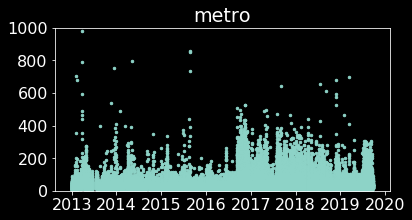

In [62]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters() # this resolves some issues with data type

plt.style.use('dark_background')
 
plt.figure(figsize=(6, 3))
plt.title('metro')
#plt.title('street')
plt.scatter(df1.ds,df1.y,6)
#plt.scatter(df2.ds,df2.y,6)
plt.ylim(0,1000)
plt.savefig('pickleToData_metro.png',transparent=True)
#plt.savefig('pickleToData_street.png',transparent=True)

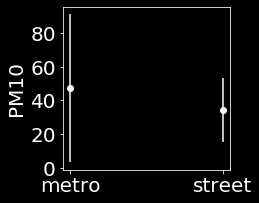

In [34]:
# plot mean +- std
#plt.style.use('dark_background')
 
m1 = pd.DataFrame.mean(df1.y)
m2 = pd.DataFrame.mean(df2.y)
s1 = pd.DataFrame.std(df1.y)
s2 = pd.DataFrame.std(df2.y)

mx1 = pd.DataFrame.max(df1.y)
mn1 = pd.DataFrame.min(df1.y)
mx2 = pd.DataFrame.max(df2.y)
mn2 = pd.DataFrame.min(df2.y)
x = [1,2]
y = [m1,m2]
dy = [s1,s2]
plt.figure(figsize=(3,3))
plt.errorbar(x, y, yerr=dy, fmt='ow');
plt.ylabel('PM10',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(ticks=[1,2], labels=['metro','street'],fontsize=20)
plt.savefig('pickleToData_plotComparison_summary.png',transparent=True)

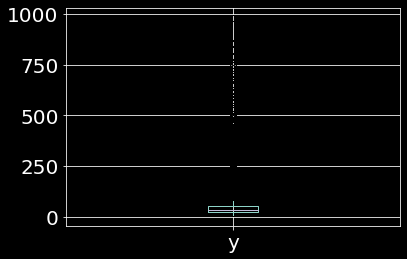

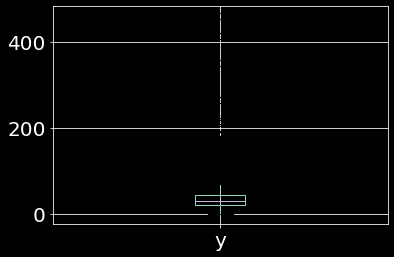

In [44]:
plt.figure(1)
boxplot = df1.boxplot(column=['y'],fontsize=20)
plt.figure(2)
boxplot = df2.boxplot(column=['y'],fontsize=20)

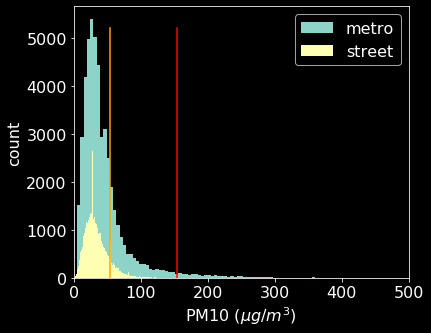

In [70]:
df_merge = df_merge.dropna()
plt.figure(figsize=(6,5))
plt.hist(df_merge['y_x'],200)
plt.hist(df_merge['y_y'],200)
plt.legend(['metro','street'],fontsize=16)
plt.plot([54,54],[0,5200],'orange')
plt.plot([154,154],[0,5200],'r')
plt.xlabel('PM10 $(\u03bcg/m^3)$')
plt.ylabel('count')
plt.xlim(0,500)
plt.savefig('pickleToData_plotComparison_historam.png',transparent=True)

#### 